In [73]:
import os
import cv2
import time
import math
import cmath
import numpy as np
from math import ceil,sqrt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
IMAGES_FOLDER_PATH = "/content/"

#Question 1


In [74]:
def lowPassNaive(gray, k):
  gray = gray.astype(np.float64)
  row,col = gray.shape
  res = np.zeros(gray.shape)
  pad = k // 2
  for i in range(pad, row - pad):
      for j in range(pad, col - pad):
          for k in range(i - pad, i + pad + 1):
              for l in range(j - pad, j + pad + 1):
                  res[i][j] = res[i][j] + gray[k][l]
          res[i][j] = res[i][j] / (k * k)
  return res

def lowPassEffic(img, sz):
  row = img.shape[0] 
  col = img.shape[1]
  res = np.zeros(img.shape)
  cum1 = np.zeros(img.shape)
  cum = np.zeros(img.shape)
  pad = sz // 2
  for i in range(row):
    cum[i][0] = img[i][0]
    for j in range(1, sz):
      cum[i][j] = cum[i][j - 1] + img[i][j]
    for j in range(sz, col):
      cum[i][j] = cum[i][j - 1] - img[i][j - sz] + img[i][j]
  for i in range(col):
    cum1[0][i] = cum[0][i]
    for j in range(1, sz):
      cum1[j][i] = cum1[j - 1][i] + cum[j][i]
    for j in range(sz, row):
      cum1[j][i] = cum1[j - 1][i] - cum[j - sz][i] + cum[j][i]
  for i in range(int(sz / 2), row - int(sz / 2)):
    for j in range(int(sz / 2), col - int(sz / 2)):
      res[i][j] = cum1[i + int(sz / 2)][j + int(sz / 2)] / (sz * sz)
  return res

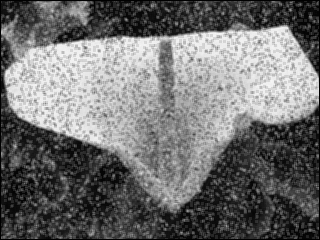

In [75]:
noisy = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "Noisy.jpg"))
noisy_gray = cv2.cvtColor(noisy,cv2.COLOR_RGB2GRAY)
five = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "flower.jpg"),cv2.COLOR_RGB2GRAY)
noisy_blur = lowPassEffic(noisy_gray,3)
cv2_imshow(noisy_blur)
kvals=[k for k in range(3, 19, 2)]

times_naive=[]
times_fast=[]
times_naive1=[]
times_fast1=[]

for k in range(3, 19, 2):
  start = time.time()
  blurred_mage = lowPassNaive(noisy_gray,k)    
  end = time.time()
  times_naive.append(end-start)
  start = time.time()
  blurred_mage = lowPassEffic(noisy_gray,k)    
  end = time.time()
  times_fast.append(end-start)

noisy_gray = cv2.cvtColor(five,cv2.COLOR_RGB2GRAY)
for k in range(3, 19, 2):
  start = time.time()
  blurred_mage = lowPassNaive(noisy_gray,k)    
  end = time.time()
  times_naive1.append(end-start)
  start = time.time()
  blurred_mage = lowPassEffic(noisy_gray,k)    
  end = time.time()
  times_fast1.append(end-start)


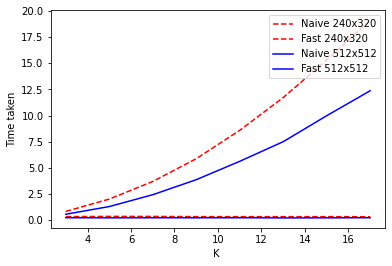

In [76]:
plt.xlabel('K ')
plt.ylabel('Time taken')

plt.plot(kvals,times_naive,'r--')
plt.plot(kvals,times_fast,'r--')

plt.plot(kvals,times_naive1,'b-')
plt.plot(kvals,times_fast1,'b-')
plt.legend(['Naive 240x320','Fast 240x320','Naive 512x512','Fast 512x512'], loc='upper right')

plt.show()

###Part 4
Median Filter

In [77]:
from sortedcontainers import SortedList
def optimisedMedFilter(img, k):
    out = np.zeros((img.shape[0]-int((k-1)), img.shape[1]-int((k-1))))
    for i in range((k-1)//2, img.shape[0]-(k-1)//2):
        window=SortedList()
        for m in range(-1*(k-1)//2, (k-1)//2+1):
            for n in range(-1*(k-1)//2, (k-1)//2+1):
                window.add(img[i+m, (k-1)//2+n])
        out[i-int((k-1)/2), 0]=window[(k ** 2)//2]
        for j in range((k-1)//2+1, img.shape[1]-(k-1)//2):
            for m in range(-1 * (k-1)//2, (k-1)//2 + 1):
                window.remove(img[i+m, j-1-(k-1)//2])
            for m in range(-1*(k-1)//2, (k-1)//2+1):
                window.add(img[i+m, j+(k-1)//2])
            out[i-(k-1)//2, j-(k-1)//2]=window[(k ** 2)//2]
    return out

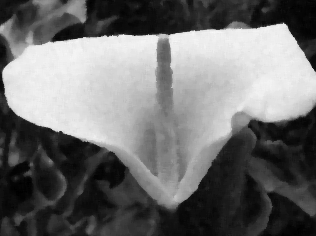

In [78]:
noisy_g = cv2.cvtColor(noisy,cv2.COLOR_RGB2GRAY)
out_median = optimisedMedFilter(noisy_g,5)
cv2_imshow(out_median)

##Question 2


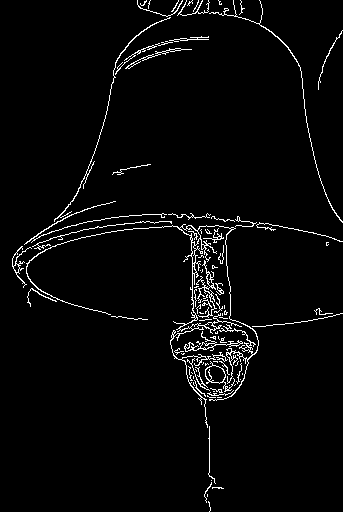

In [79]:
bell = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "bell.jpg"))
gray = cv2.cvtColor(bell, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 180)
cv2_imshow(edges)

In [115]:
def convolvolutionHelper(img, fil):
  img = img.astype(np.float64)
  fil = fil.astype(np.float64)
  rows = img.shape[0]
  cols = img.shape[1]
  fl = fil.shape[0]
  fb = fil.shape[1]
  res = np.zeros(img.shape)
  for i in range(fl//2, rows - (fl-1) // 2):
    for j in range(fb//2, cols - (fb - 1) // 2):
      res[i][j] = max(0, sum(sum(fil * img[i - fl // 2 : i + (fl - 1) // 2 + 1, j - fb // 2 :j + (fb - 1) // 2 + 1])))
  return res.astype(np.uint8)

Text(0.5, 1.0, 'prewitt Y filter')

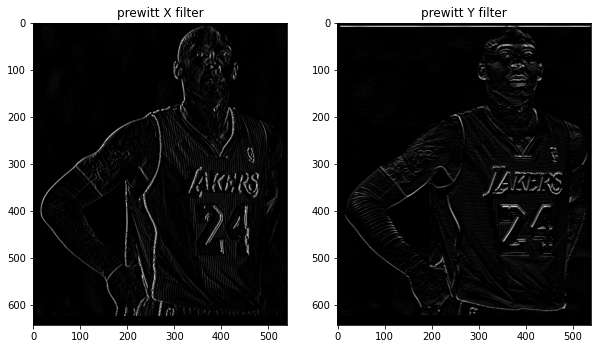

In [116]:
mamba = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "kobe.png"),  cv2.IMREAD_GRAYSCALE)
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
px_out = convolvolutionHelper(mamba, prewittx)

prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
py_out = convolvolutionHelper(mamba, prewitty)
fig, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(px_out,cmap='gray')
ax[0].set_title('prewitt X filter')
ax[1].imshow(py_out,cmap='gray')
ax[1].set_title('prewitt Y filter')


Text(0.5, 1.0, 'Sobel Y filter')

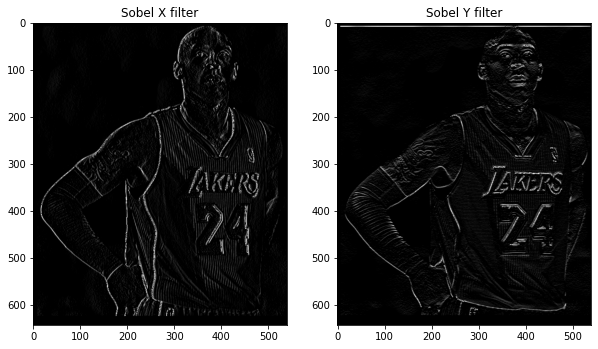

In [82]:
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sx_out = convolvolutionHelper(mamba, sobelx)

sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sy_out = convolvolutionHelper(mamba, sobely)

fig, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(sx_out,cmap='gray')
ax[0].set_title('Sobel X filter')
ax[1].imshow(sy_out,cmap='gray')
ax[1].set_title('Sobel Y filter')

Text(0.5, 1.0, 'Robert Y filter')

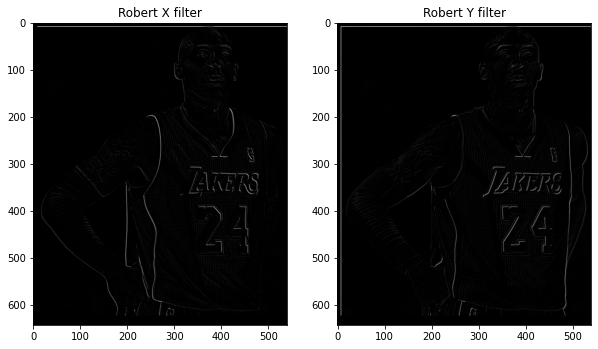

In [83]:
robertx = np.array([[0, 1], [-1, 0]])
rx_out = convolvolutionHelper(mamba, robertx)

roberty = np.array([[1, 0], [0, -1]])
ry_out = convolvolutionHelper(mamba, roberty)

fig, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(rx_out,cmap='gray')
ax[0].set_title('Robert X filter')
ax[1].imshow(ry_out,cmap='gray')
ax[1].set_title('Robert Y filter')


Text(0.5, 1.0, 'Laplace Y filter')

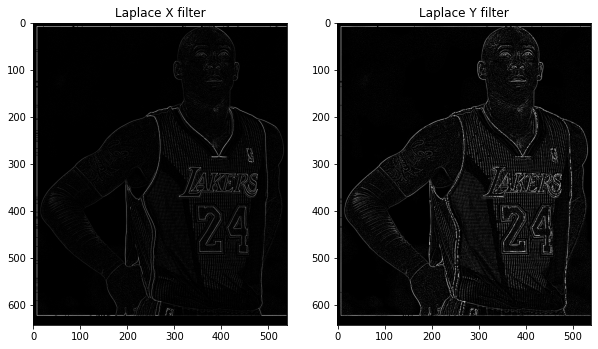

In [84]:
laplacex = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
lx_out = convolvolutionHelper(mamba, laplacex)

laplacey = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
ly_out = convolvolutionHelper(mamba, laplacey)

fig, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(lx_out,cmap='gray')
ax[0].set_title('Laplace X filter')

ax[1].imshow(ly_out,cmap='gray')
ax[1].set_title('Laplace Y filter')

Text(0.5, 1.0, 'Prewitt 5x5 Y filter')

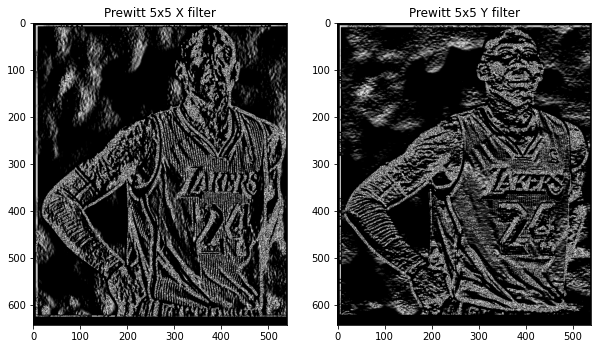

In [85]:
prewitt5y = np.array([[9, 9, 9,9,9], [9, 5, 5,5,9], [-7, -3, 0,-3 , -7],[-7 ,-3,-3,-3,-7],[-7,-7,-7,-7,-7]])
p5y_out = convolvolutionHelper(mamba, prewitt5y)

prewitt5x = np.array([[9, 9, -7,-7,-7], [9, 5, -3,-3,-7], [9, 5, 0,-3 , -7],[9 ,5,-3,-3,-7],[9,9,-7,-7,-7]])
p5x_out = convolvolutionHelper(mamba, prewitt5x)

fig, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(p5x_out,cmap='gray')
ax[0].set_title('Prewitt 5x5 X filter')
ax[1].imshow(p5y_out,cmap='gray')
ax[1].set_title('Prewitt 5x5 Y filter')

In [86]:
gauss = np.random.normal(0,10,(mamba.shape[0],mamba.shape[1]))
gauss = gauss.reshape(mamba.shape)
noisy_img = mamba.astype(np.float64) + np.random.normal(0.0, 10, mamba.shape)

In [87]:
noisy_img = mamba + np.random.normal(0.0, 1.0, mamba.shape)*50

gauss = np.random.normal(0,10,(mamba.shape[0],mamba.shape[1])).reshape(mamba.shape)
noisy_kobe = mamba.astype(np.float64) + np.random.normal(0.0, 10, mamba.shape)

noise_images = []
noise_images.append(convolvolutionHelper(noisy_kobe, prewittx))
noise_images.append(convolvolutionHelper(noisy_kobe, prewitty))
noise_images.append(convolvolutionHelper(noisy_kobe, sobelx))
noise_images.append(convolvolutionHelper(noisy_kobe, sobely))
noise_images.append(convolvolutionHelper(noisy_kobe, laplacex))
noise_images.append(convolvolutionHelper(noisy_kobe, laplacey))
noise_images.append(convolvolutionHelper(noisy_kobe, robertx))
noise_images.append(convolvolutionHelper(noisy_kobe, roberty))

Text(0.5, 1.0, 'Robert Y filter on noisy image')

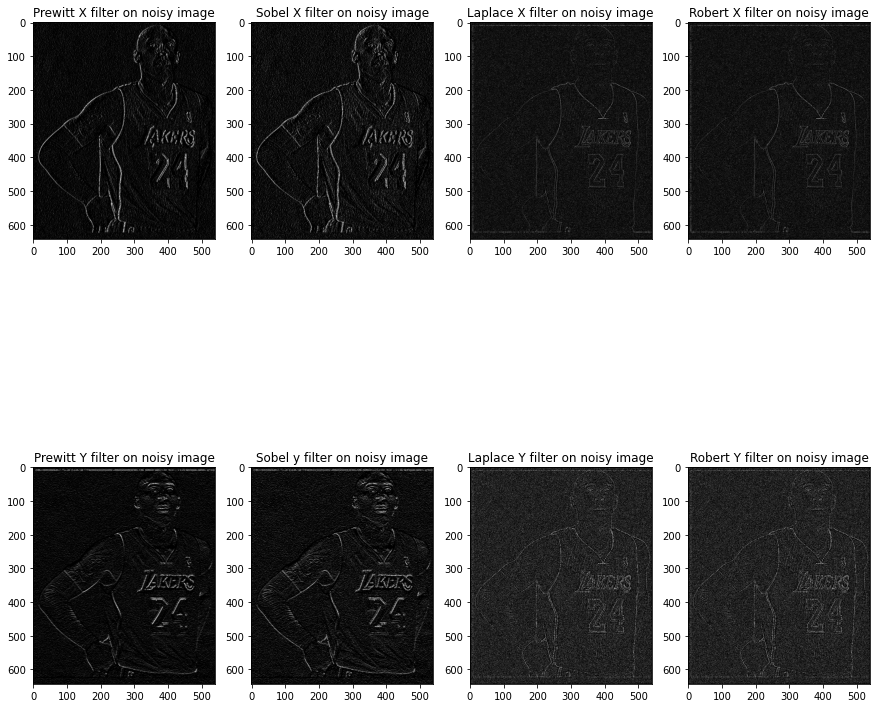

In [88]:
fig, ax = plt.subplots(2, 4,figsize=(15,15))
ax[0,0].imshow(noise_images[0],cmap='gray')
ax[0,0].set_title('Prewitt X filter on noisy image')

ax[1,0].imshow(noise_images[1],cmap='gray')
ax[1,0].set_title('Prewitt Y filter on noisy image')

ax[0,1].imshow(noise_images[2],cmap='gray')
ax[0,1].set_title('Sobel X filter on noisy image')

ax[1,1].imshow(noise_images[3],cmap='gray')
ax[1,1].set_title('Sobel y filter on noisy image')

ax[0,2].imshow(noise_images[4],cmap='gray')
ax[0,2].set_title('Laplace X filter on noisy image')

ax[1,2].imshow(noise_images[5],cmap='gray')
ax[1,2].set_title('Laplace Y filter on noisy image')

ax[0,3].imshow(noise_images[4],cmap='gray')
ax[0,3].set_title('Robert X filter on noisy image')

ax[1,3].imshow(noise_images[5],cmap='gray')
ax[1,3].set_title('Robert Y filter on noisy image')

##Question 3


In [89]:
def distance(x, y):
  return np.sqrt((x)**2 + (y)**2)

def gaussian(x, sigma):
  return math.exp(- (x ** 2) / (2 * sigma ** 2))

def bilateralFilter(img,ss,sd,k):
  img = img.astype(np.float64)
  row,col,_ = img.shape
  res = np.zeros(img.shape)
  pad = k // 2

  gauss = np.zeros((k,k))
  for i in range(-pad , pad + 1):
    for j in range(-pad , pad + 1):
      gauss[i + pad][j + pad] = gaussian(distance(i,j),ss)
    
  for i in range(pad, row - pad):
    for j in range(pad, col - pad):
      for l in range(3):
        temp = img[i - pad:i + pad + 1,j - pad : j + pad + 1,l:l + 1].reshape(k,k)
        dist = ((temp - img[i][j][l]) * (temp - img[i][j][l])) / (2 * sd ** 2)
        dist = np.exp(-dist)
        kernel = dist * gauss
        norm = sum(sum(kernel))
        kernel = kernel / norm
        res[i][j][l] = sum(sum(temp * kernel))

  return res.astype(np.uint8)

def gaussianFilter(img,ss,k):
  img = img.astype(np.float64)
  row,col= img.shape
  res = np.zeros(img.shape)
  pad = k // 2
  gauss = np.zeros((k,k))
  for i in range(-pad , pad + 1):
    for j in range(-pad , pad + 1):
      gauss[i][j] = gaussian(distance(i,j),ss)
    
  for i in range(pad, row - pad):
    for j in range(pad, col - pad):
      temp = img[i - pad:i + pad + 1,j - pad : j + pad + 1]
      temp = temp.reshape(k,k)
      kernel = gauss
      norm = sum(sum(kernel))
      kernel = kernel / norm
      res[i][j] = sum(sum(temp * kernel))
  return res.astype(np.uint8)


(-0.5, 290.5, 387.5, -0.5)

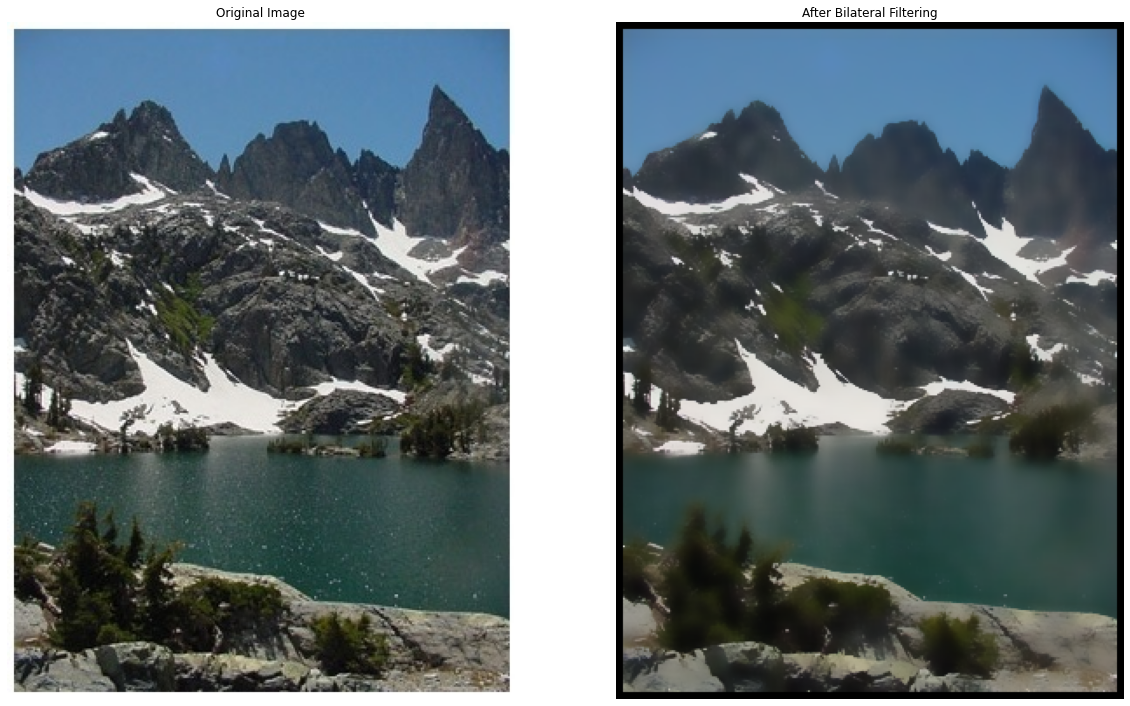

In [90]:
mountain = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "mountain.jpg"))
output = bilateralFilter(mountain, 800, 40, 9)
fig, ax = plt.subplots(1, 2,figsize=(20,20))
ax[0].imshow(cv2.cvtColor(mountain, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
ax[1].set_title("After Bilateral Filtering")
ax[1].axis('off')

In [91]:
def crossBilateralFilter(imgf,img,ss,sd,k):
  img = img.astype(np.float64)
  imgf = imgf.astype(np.float64)
  row,col,_ = imgf.shape
  res = np.zeros(imgf.shape)
  pad = k // 2
  
  gauss = np.zeros((k,k))
  for i in range(-pad , pad + 1):
    for j in range(-pad , pad + 1):
      gauss[i][j] = gaussian(distance(i,j),ss)
    
  for i in range(pad, row - pad):
      for j in range(pad, col - pad):
          for l in range(3):
            temp = imgf[i - pad:i + pad + 1,j - pad : j + pad + 1,l:l + 1]
            temp = temp.reshape(k,k)
            dist = temp - img[i][j][l]
            dist = np.multiply(dist , dist)
            dist = dist / (2 * sd ** 2)
            dist = np.exp(-dist)
            kernel = np.multiply(dist,gauss)
            norm = sum(sum(kernel))
            kernel = kernel / norm
            res[i][j][l] = sum(sum(np.multiply(temp ,kernel)))

  return res.astype(np.uint8)

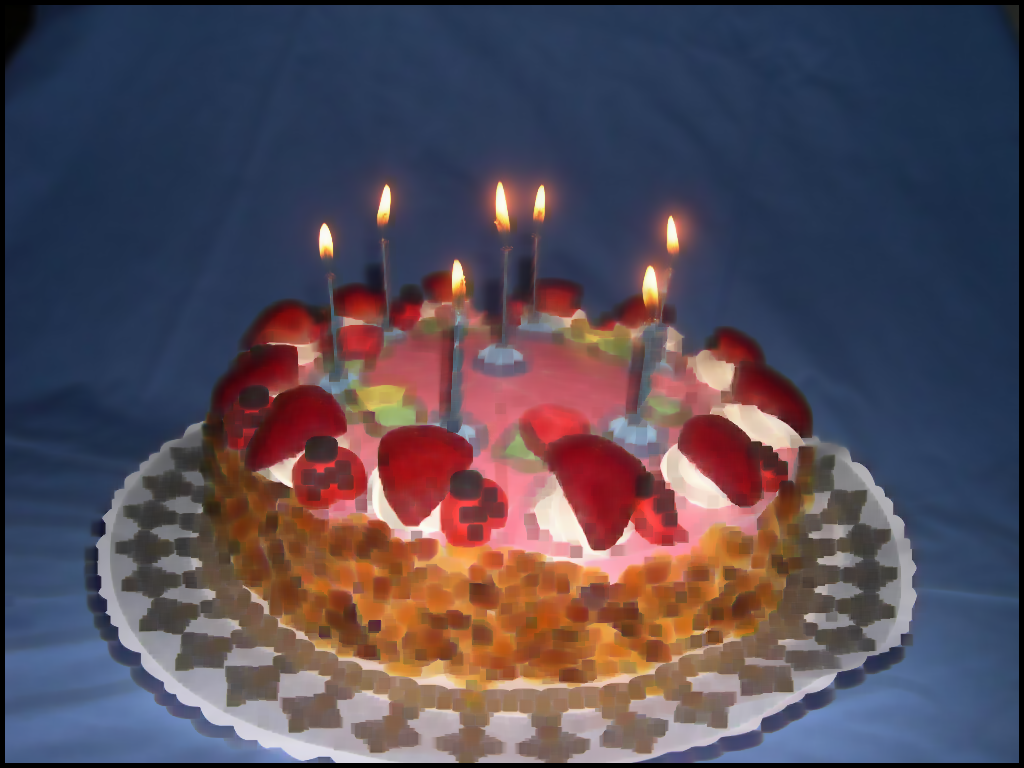

In [92]:
cakeflash = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "cake_flash.jpg"))
cakenoflash = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "cake_noflash.jpg"))
output = np.zeros(cakeflash.shape)
output = crossBilateralFilter(cakeflash,cakenoflash,1000,40,11)

cv2_imshow(output)

##Question 4

In [117]:
def adaptiveThreshold(img):
  h = img.shape[0]
  w = img.shape[1]
  S = w/2
  s2 = S/50
  T = 3.0
  img1 = np.zeros_like(img, dtype=np.uint32)
  for col in range(w):
    for row in range(h):
      img1[row,col] = img[0:row,0:col].sum()
  out = np.zeros_like(img)    
  for col in range(w):
    x0 = int(max(col-s2, 0))
    x1 = int(min(col+s2, w-1))
    for row in range(h):
      y0 = int(max(row-s2, 0))
      y1 = int(min(row+s2, h-1))
      cnt = (y1-y0)*(x1-x0)
      sumr = img1[y1, x1]-img1[y0, x1]-img1[y1, x0]+img1[y0, x0]
      if img[row, col]*cnt >= sumr*(100.-T)/100.:
        out[row,col] = 255
      else:
        out[row,col] = 0
  return out.astype('uint8')

In [94]:
car = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "car.jpg"))
bout = bilateralFilter(car,1000,40,13)
carg = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)

In [95]:
car1 = gaussianFilter(carg,3,3)
tout = adaptiveThreshold(car1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in uint_scalars


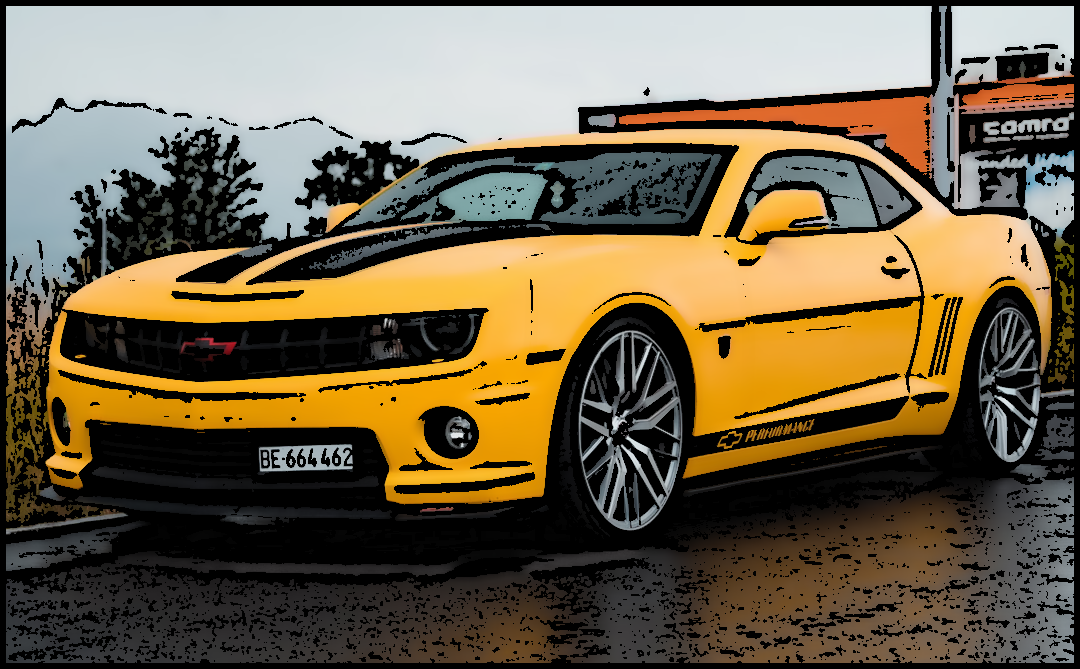

In [96]:
temp1 = bout[:,:,0].reshape(bout.shape[0],bout.shape[1])
temp2 = bout[:,:,1].reshape(bout.shape[0],bout.shape[1])
temp3 = bout[:,:,2].reshape(bout.shape[0],bout.shape[1])

acar = np.zeros(car.shape)
acar1 = np.bitwise_and(tout,temp1)
acar2 = np.bitwise_and(tout,temp2)
acar3 = np.bitwise_and(tout,temp3)
acar = np.dstack([acar1,acar2,acar3])
cv2_imshow(acar)

##Question 5

####All functions required for Part 1, 2 and 3

In [97]:
def DFT_1D(n):
  out = np.ones(n)
  E = []
  for k in range(n):
    E.append(np.exp(np.complex(0, -1) * 2.0 * np.pi * k / n))
  E = np.array(E)
  out = np.vstack([out,E])
  tem = E
  for i in range(n - 2):
    tem = E * tem
    out = np.vstack([out,tem])
  return out

In [98]:
def DFT_2D(x):
   col = np.matmul(DFT_1D(x.shape[0]),x)
   col = np.transpose(col)
   out = np.matmul(DFT_1D(col.shape[0]),col)
   out = np.transpose(out)
   return out

In [99]:
def fft_1D(a):
  n = a.shape[0]
  if n == 1: return a 
  y_even = fft_1D(a[0::2]);
  y_odd = fft_1D(a[1::2]);
  E = [np.exp(-2j * np.pi * k/n) for k in range(int(n/2))]
  E = np.array(E)
  y = y_even + E * y_odd
  y = np.append(y, y_even - E * y_odd)
  return y

In [100]:
def fft_1Dt(a):
  n = a.shape[1]
  if n == 1: return a 
  y_even = fft_1Dt(a[:,0::2]);
  y_odd = fft_1Dt(a[:,1::2]);
  E = [np.exp(-2j * np.pi * k/n) for k in range(int(n/2))]
  E = np.array(E)
  y = y_even + E * y_odd
  y = np.append(y, y_even - E * y_odd, axis =1)
  return y

def fft_2D(I):
  col = fft_1Dt(I)
  col = np.transpose(col)
  out = fft_1Dt(col)
  out = np.transpose(out)
  return out

In [101]:
def ifft_1Dt(a):
  n = a.shape[1]
  if n == 1: return a 
  y_even = ifft_1Dt(a[:,0::2]);
  y_odd = ifft_1Dt(a[:,1::2]);
  E = [np.exp(2j * np.pi * k/n) for k in range(int(n/2))]
  E = np.array(E)
  y = y_even + E * y_odd
  y = np.append(y, y_even - E * y_odd, axis =1)
  return y

def ifft_2D(I):
  col = fft_1Dt(I)
  col = np.transpose(col)
  out = fft_1Dt(col)
  out = np.transpose(out)
  return out/(out.shape[0] * out.shape[1])

###Part 2

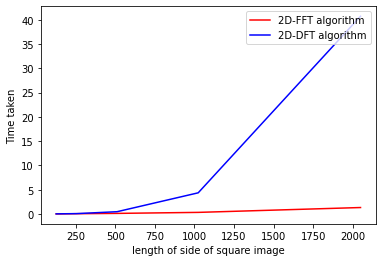

In [102]:
image_list = []
img256 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "cat.jpg"))

image_list.append(img256[0:128,0:128,:])
image_list.append(img256)
image_list.append(cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "yak.png")))
image_list.append(cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "tree.jpg")))
image_list.append(cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "scenery.jpg")))
times_fast = []
times_naive = []
for img in image_list:
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  start = time.time()
  fft_img = fft_2D(gray_img)
  end = time.time()
  times_naive.append(end-start)
  start = time.time()
  dft_img = DFT_2D(gray_img)    
  end = time.time()
  times_fast.append(end-start)
plt.xlabel('length of side of square image')
plt.ylabel('Time taken')
kvals = [128,256,512,1024,2048]
plt.plot(kvals,times_naive,'r-')
plt.plot(kvals,times_fast,'b-')
plt.legend(['2D-FFT algorithm','2D-DFT algorithm'], loc='upper right')

###Part 4
####We observe that if we take the conjugate of our fft matrix and we take the absolute of the resultant fft then we get back the orginal image


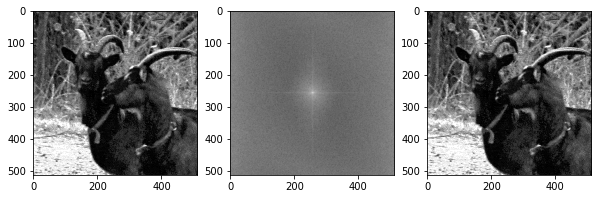

In [103]:
peng1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "yak.png"))
peng = cv2.cvtColor(peng1, cv2.COLOR_BGR2GRAY)
peng_fft = fft_2D(peng)
peng_fft2 = fft_2D(np.fft.fftshift(np.conj(peng_fft)))
fig, ax = plt.subplots(1, 3,figsize=(10,10))
ax[0].imshow(peng,cmap='gray')
ax[1].imshow(np.log(1 + np.abs(np.fft.fftshift(peng_fft))),cmap='gray')
ax[2].imshow(np.abs((peng_fft2)),cmap='gray')

##Question 6

Function of convolution

In [104]:
def convolution(img1,img2):
  img1 = img1.astype(np.int64)
  img2 = img2.astype(np.int64)
  img1 = np.flip(img1)
  r2 = img2.shape[0]
  c2 = img2.shape[1]
  row1 = img1.shape[0]
  col1 = img1.shape[1]
  if row1 % 2 == 0:
   img1 = cv2.copyMakeBorder(img1, 1, 0 , 1, 0,cv2.BORDER_CONSTANT)
  row1 = img1.shape[0]
  col1 = img1.shape[1]
  res = np.zeros((img2.shape[0], img2.shape[1]))
  img2 = cv2.copyMakeBorder(img2, row1//2, row1//2 , col1//2, col1//2,cv2.BORDER_CONSTANT)
  row2 = img2.shape[0]
  col2 = img2.shape[1]
  for i in range(0, row2 - row1 + 1):
      for j in range(0, col2 - row1 + 1):
            kernel = img2[i:i + row1,j:j + col1]  * img1
            res[i][j]= np.sum(kernel, dtype = np.int64)
  return res[0:r2,0:c2].astype(np.int64)

In [105]:
tw1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "stonehenge.jpg"))
gray_tw1 = cv2.cvtColor(tw1, cv2.COLOR_BGR2GRAY)
tw2 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "panda.jpg"))
gray_tw2 = cv2.cvtColor(tw2, cv2.COLOR_BGR2GRAY)

gray_tw11 = gray_tw1[0:256,0:256]
gray_tw22 = gray_tw2[0:256,0:256]

out = convolution(gray_tw11,gray_tw22)

###part 1


Text(0.5, 1.0, 'IFFT of multiplication')

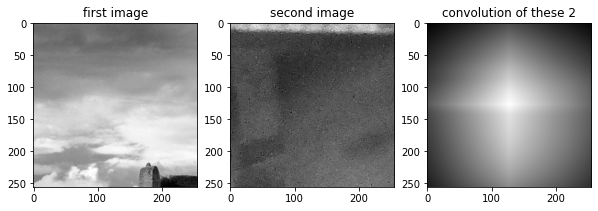

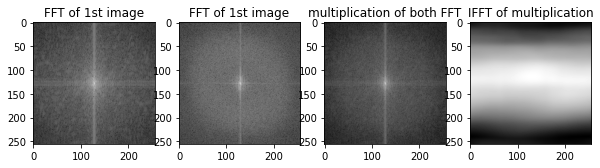

In [106]:
fft_21 = fft_2D(gray_tw11)
fft_22 = fft_2D(gray_tw22)
fft_mul = fft_21 * fft_22
ifft_mul = ifft_2D(fft_mul)
fig, ax = plt.subplots(1, 3,figsize=(10,10))

ax[0].imshow(gray_tw11,cmap='gray')
ax[0].set_title('first image')
ax[1].imshow(gray_tw22,cmap='gray')
ax[1].set_title('second image')

ax[2].imshow(out,cmap='gray')
ax[2].set_title('convolution of these 2')

fig1, ax1 = plt.subplots(1, 4,figsize=(10,10))
ax1[0].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_21))),cmap='gray')
ax1[0].set_title('FFT of 1st image')

ax1[1].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_22))),cmap='gray')
ax1[1].set_title('FFT of 1st image')

ax1[2].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_mul))),cmap='gray')
ax1[2].set_title('multiplication of both FFT')

ax1[3].imshow(np.abs(ifft_mul),cmap='gray')
ax1[3].set_title('IFFT of multiplication')

In [107]:
out2 = np.abs(ifft_mul)
err = out2 - out
err = err * err
sum_mean = sum(sum(err))
print('the mean squared error per pixel is {}'.format(sum_mean/(256 ** 2)))

the mean squared error per pixel is 3.3551073731957284e+16


###Part 2
####padding the image with 127 on 128 on alternate sides to get an image of 511x511 and then doing convolution . the fft function expects the image to be a power of 2 that is why I have further padded this image to 512x512 to calculate fft of both images and corresponding ifft.

In [108]:
gray_tw11pad = cv2.copyMakeBorder(gray_tw11, 127, 128, 127, 128, cv2.BORDER_CONSTANT)
gray_tw22pad = cv2.copyMakeBorder(gray_tw22, 127, 128, 127, 128, cv2.BORDER_CONSTANT)
out511 = convolution(gray_tw11pad,gray_tw22pad)


Text(0.5, 1.0, 'IFFT of multiplication')

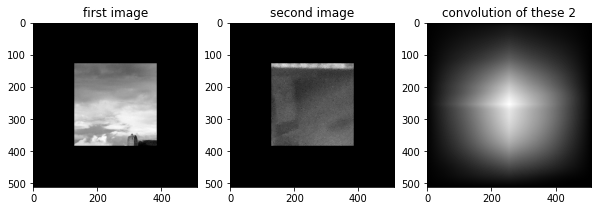

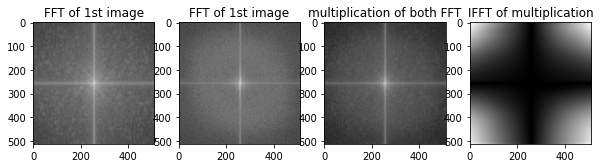

In [109]:
gray_tw11pad1 = cv2.copyMakeBorder(gray_tw11pad, 1, 0 , 1, 0,cv2.BORDER_CONSTANT)
gray_tw22pad1 = cv2.copyMakeBorder(gray_tw22pad, 1, 0 , 1, 0,cv2.BORDER_CONSTANT)
fft_21p = fft_2D(gray_tw11pad1.astype(np.int64))
fft_22p = fft_2D(gray_tw22pad1.astype(np.int64))
fft_mulp = np.multiply(fft_21p , fft_22p)
ifft_mulp = ifft_2D(fft_mulp)
fig, ax = plt.subplots(1, 3,figsize=(10,10))
ax[0].imshow(gray_tw11pad1,cmap='gray')
ax[0].set_title('first image')

ax[1].imshow(gray_tw22pad1,cmap='gray')
ax[1].set_title('second image')

ax[2].imshow(out511,cmap='gray')
ax[2].set_title('convolution of these 2')

fig1, ax1 = plt.subplots(1, 4,figsize=(10,10))

ax1[0].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_21p))),cmap='gray')
ax1[0].set_title('FFT of 1st image')

ax1[1].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_22p))),cmap='gray')
ax1[1].set_title('FFT of 1st image')

ax1[2].imshow(np.log(1 + np.abs(np.fft.fftshift(fft_mulp))),cmap='gray')
ax1[2].set_title('multiplication of both FFT')

ax1[3].imshow(np.abs(ifft_mulp),cmap='gray')
ax1[3].set_title('IFFT of multiplication')



In [110]:
errp = np.real(ifft_mulp) - cv2.copyMakeBorder(out511, 1, 0 , 1, 0,cv2.BORDER_CONSTANT)
errp = errp * errp
tot_err = sum(sum(errp)) / (512 ** 2)
print('the mean squared error per pixel is {}'.format(tot_err))

the mean squared error per pixel is 2.6616313934217404e+16


Part 2 continued

Text(0.5, 1.0, '512x512 image')

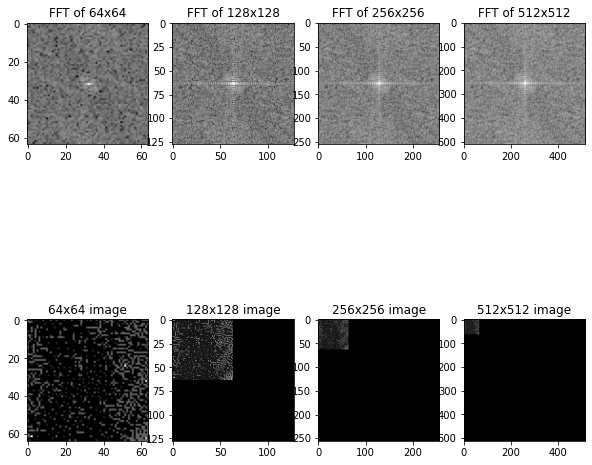

In [111]:
rand64c = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "yak.png"))
rand64 = cv2.cvtColor(rand64c[340:404,340:404], cv2.COLOR_BGR2GRAY)

rand128 = np.zeros((128,128))
rand128[0:64,0:64] = rand64
rand256 = np.zeros((256,256))
rand256[0:64,0:64] = rand64
rand512 = np.zeros((512,512))
rand512[0:64,0:64] = rand64

rand64fft = fft_2D(rand64)
rand128fft = fft_2D(rand128)
rand256fft = fft_2D(rand256)
rand512fft = fft_2D(rand512)

fig1, ax1 = plt.subplots(2, 4,figsize=(10,10))

ax1[0,0].imshow(np.log(1 + np.abs(np.fft.fftshift(rand64fft))),cmap='gray')
ax1[0,0].set_title('FFT of 64x64')

ax1[1,0].imshow(rand64,cmap='gray')
ax1[1,0].set_title('64x64 image')

ax1[0,1].imshow(np.log(1 + np.abs(np.fft.fftshift(rand128fft))),cmap='gray')
ax1[0,1].set_title('FFT of 128x128')

ax1[1,1].imshow(rand128,cmap='gray')
ax1[1,1].set_title('128x128 image')

ax1[0,2].imshow(np.log(1 + np.abs(np.fft.fftshift(rand256fft))),cmap='gray')
ax1[0,2].set_title('FFT of 256x256')

ax1[1,2].imshow(rand256,cmap='gray')
ax1[1,2].set_title('256x256 image')

ax1[0,3].imshow(np.log(1 + np.abs(np.fft.fftshift(rand512fft))),cmap='gray')
ax1[0,3].set_title('FFT of 512x512')

ax1[1,3].imshow(rand512,cmap='gray')
ax1[1,3].set_title('512x512 image')

As padding increases, the obtained transforms are much clearer.

This is because increased padding means more samples from the continuous fourier transform. This leads to more accurate discrete time fourier transforms, which can be clearly observed here.


##Question 7

Text(0.5, 1.0, 'denoised lena')

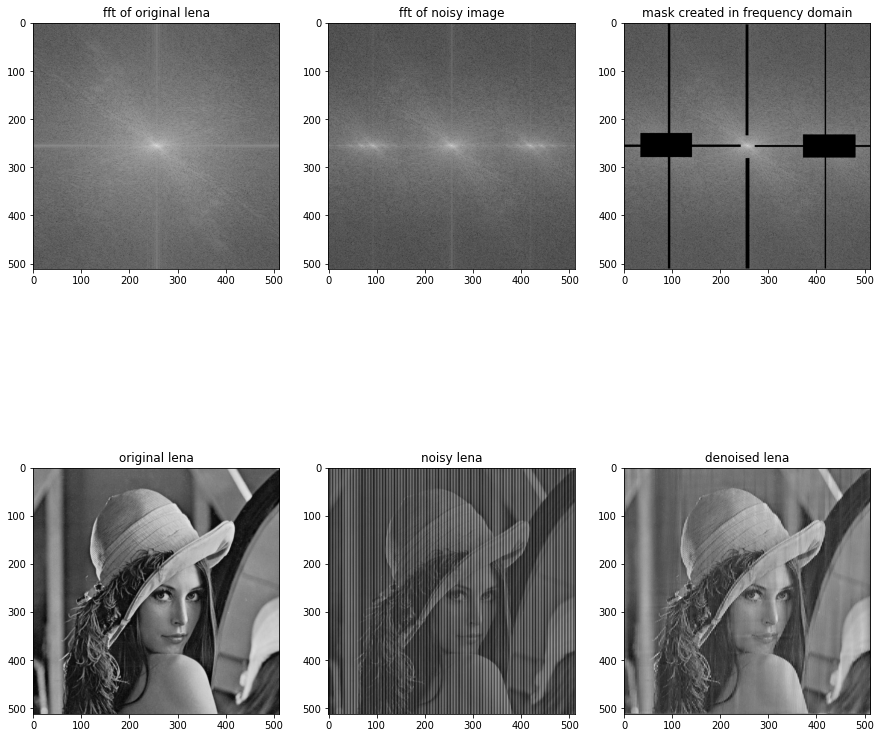

In [112]:
noisy_lena1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "noisy_lena.png"))
noisy_lena = cv2.cvtColor(noisy_lena1, cv2.COLOR_BGR2GRAY)
lena1 = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, "lena_test.jpg"))
lena = cv2.cvtColor(lena1, cv2.COLOR_BGR2GRAY)

nlfft = np.fft.fftshift(fft_2D(noisy_lena))
lena_fft = fft_2D(lena)
temp = np.copy(nlfft)

nlfft[0:511,91:96]=0
nlfft[0:511,416:419]=0
nlfft[5:235,252:258] = 0
nlfft[282:511,252:260] = 0

nlfft[230:280,34:141] = 0
nlfft[233:281,371:480] = 0

nlfft[254:259,0:242] = 0
nlfft[255:259,271:511] = 0

newlena = np.fft.ifftshift(nlfft)
newlena = ifft_2D(newlena)
newlena = np.real(newlena)
fig, ax = plt.subplots(2, 3,figsize=(15,15))

ax[0, 0].imshow(np.log(1 + np.abs(np.fft.fftshift(lena_fft))),cmap='gray')
ax[0, 0].set_title("fft of original lena")
 
ax[0, 1].imshow(np.log(1 + np.abs(temp)),cmap='gray')
ax[0, 1].set_title("fft of noisy image")
 
ax[0, 2].imshow(np.log(1 + np.abs((nlfft))),cmap='gray')
ax[0, 2].set_title("mask created in frequency domain")
 
ax[1, 0].imshow(lena,cmap='gray')
ax[1, 0].set_title("original lena")
 
ax[1, 1].imshow(noisy_lena,cmap='gray')
ax[1, 1].set_title("noisy lena")
 
ax[1, 2].imshow(np.flip(newlena),cmap='gray')
ax[1, 2].set_title("denoised lena")